In [ ]:
import torch
from torchvision import datasets, transforms

# Transformation: convert images to tensors
transform = transforms.ToTensor()

# Download and load MNIST
train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

# Extract raw tensors
X_train = train_dataset.data          # shape: (60000, 28, 28)
y_train = train_dataset.targets       # shape: (60000,)

X_test = test_dataset.data             # shape: (10000, 28, 28)
y_test = test_dataset.targets          # shape: (10000,)

# Normalize to [0, 1] and add channel dimension
X_train = X_train.unsqueeze(1).float() / 255.0  # (60000, 1, 28, 28)
X_test = X_test.unsqueeze(1).float() / 255.0    # (10000, 1, 28, 28)

print(X_train.shape, y_train.shape)


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 506kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.60MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.33MB/s]


torch.Size([60000, 1, 28, 28]) torch.Size([60000])


In [ ]:
import numpy as np




class NeuralNetwork:
  def __init__(self, layer_sizes):
    self.layer_sizes = layer_sizes
    self.num_layers = len(layer_sizes) - 1

    self.weights = []
    self.biases = []

    for i in range(self.num_layers):
        self.weights.append(
            0.01 * np.random.randn(layer_sizes[i], layer_sizes[i+1])
        )
        self.biases.append(
            np.zeros((1, layer_sizes[i+1]))
        )

  def relu(self, x):
    return np.maximum(0, x)

  def relu_derivative(self, x):
    return (x > 0).astype(float)

  def softmax(self, x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

  def forward(self, x):
    self.a = []
    self.z = []

    a = x.reshape(1, -1)
    self.a.append(a)

    for i in range(self.num_layers):
      z = a @ self.weights[i] + self.biases[i]
      self.z.append(z)

      if i < self.num_layers - 1:
          a = self.relu(z)
      else:
          a = z

      self.a.append(a)

    return a

  def mse(self, y_pred, y_true):
      return np.mean((y_pred - y_true) ** 2)

  def backprob(self, y_true, lr=0.001):
    deltas = [None] * self.num_layers

    deltas[-1] = 2 * (self.a[-1] - y_true)

    for l in range(self.num_layers - 2, -1, -1):
        deltas[l] = (
            deltas[l+1] @ self.weights[l+1].T
        ) * self.relu_derivative(self.z[l])

    for l in range(self.num_layers):
        dW = self.a[l].T @ deltas[l]
        db = deltas[l]

        self.weights[l] -= lr * dW
        self.biases[l] -= lr * db

    for l in range(3):
      dW = self.a[l].T @ deltas[l]
      db = deltas[l]

      self.weights[l]





In [ ]:
model = NeuralNetwork([28*28, 256, 256, 10])
lr = 0.001


for i in range(len(X_train)):
    x = X_train[i].numpy() if hasattr(X_train[i], "numpy") else X_train[i]
    y = np.zeros((1, 10))
    y[0, y_train[i]] = 1

    y_pred = model.forward(x)
    loss = model.mse(y_pred, y)

    model.backprob(y, lr)


In [ ]:
from PIL import Image
import numpy as np

def preprocess_image(path):
    img = Image.open(path).convert("L")      # grayscale
    img = img.resize((28, 28))                # resize
    img = np.array(img)                       # to numpy                         # invert (MNIST style)
    img = img / 255.0                         # normalize [0,1]ns/img_1.jpg")
    img = img.reshape(-1)                     # (784,)
    return img

In [ ]:
x = preprocess_image("/root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/img_11.jpg")

y_pred = model.forward(x)
predicted_class = np.argmax(y_pred)

print("Predicted digit:", predicted_class)
print("Raw output:", y_pred)


Predicted digit: 5
Raw output: [[-0.03114249  0.00452848 -0.04258819  0.06878949 -0.06341641  0.85559422
  -0.00197509 -0.04013064  0.14732313  0.09518038]]


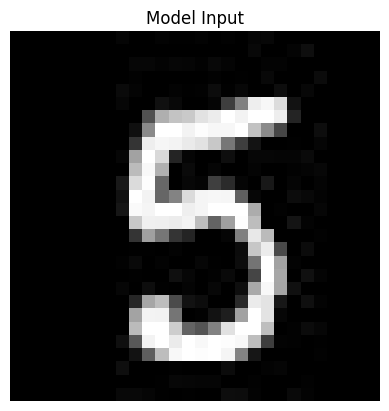

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x.reshape(28, 28), cmap="gray")
plt.title("Model Input")
plt.axis("off")
plt.show()
